In [2]:
!pip install jinja2

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp313-cp313-win_amd64.whl (15 kB)

   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   ---------------------------------------- 2/2 [jinja2]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd

main_data = np.loadtxt("Data_principal.dat")

time = main_data[:, 0]
observed = main_data[:, 1]
calculated=main_data[:,2]
reesiduals=main_data[:,3]
point_weight=main_data[:,4]
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("Periods.txt")
# Obtener frecuencias y parámetros de los periodos
freq1 = periodos[0, 0]  # Frecuencia principal (datos observados)
amp1 = periodos[0, 1]   # Amplitud
phase1 = periodos[0, 2] # Fase

freq2 = periodos[1, 0]  # Frecuencia secundaria (residuos)
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

# Cargar transformadas de Fourier
tf_observed=np.loadtxt("FT_data.txt")
tf_observed_freq=tf_observed[:,0]
tf_observed_amp=tf_observed[:,1]

tf_residuals=np.loadtxt("TF_residuos.txt")
tf_residuals_freq=tf_residuals[:,0]
tf_residuals_amp=tf_residuals[:,1]

tf_spectral_window=np.loadtxt("TF_Freq_folded_with_spectral_window.txt")
tf_spectral_window_freq=tf_residuals[:,0]
tf_spectral_window_amp=tf_residuals[:,1]

#ruido
noise_spectrum=np.loadtxt("Noisefrequency.dat")
noise_amp=noise_spectrum[:,1]
freq_for_noise=noise_spectrum[:,0]

#ruido freq1
noisefre=np.loadtxt("Noises_singles.dat")
sn_f1=noisefre[0,2]
noise_amp_f1=noisefre[0,1]
freq_f1=noisefre[0,0]

sn_f2=noisefre[1,2]
noise_amp_f2=noisefre[1,1]
freq_f2=noisefre[1,0]

                    ANÁLISIS DE PERIODICIDAD ESTELAR
                         usando Period04

1. INFORMACIÓN DE LOS DATOS
Número de observaciones:        1646
Intervalo temporal:             0.18 días
Cadencia media:                 0.0001 días (0.00 horas)
Magnitud media:                 -0.0020 ± 0.0350
Rango de variación:             0.3881 mag
Error fotométrico medio:        0.007897 mag

2. FRECUENCIA PRINCIPAL (f₁)
Frecuencia:                     40.008891 c/d
Período:                        0.024994 días
                                0.5999 horas
                                35.99 minutos
Amplitud:                       0.009917 mag
Fase:                           0.916277

ANÁLISIS DE SEÑAL A RUIDO:
Amplitud del pico:              0.009917 mag
Amplitud del ruido local:       0.007742 mag
Señal a Ruido (S/N):            1.04
Significancia estadística:      BAJA - Detección marginal o dudosa
Probabilidad de ser real:       <95%
Frecuencias independientes:     ~839
Probabili

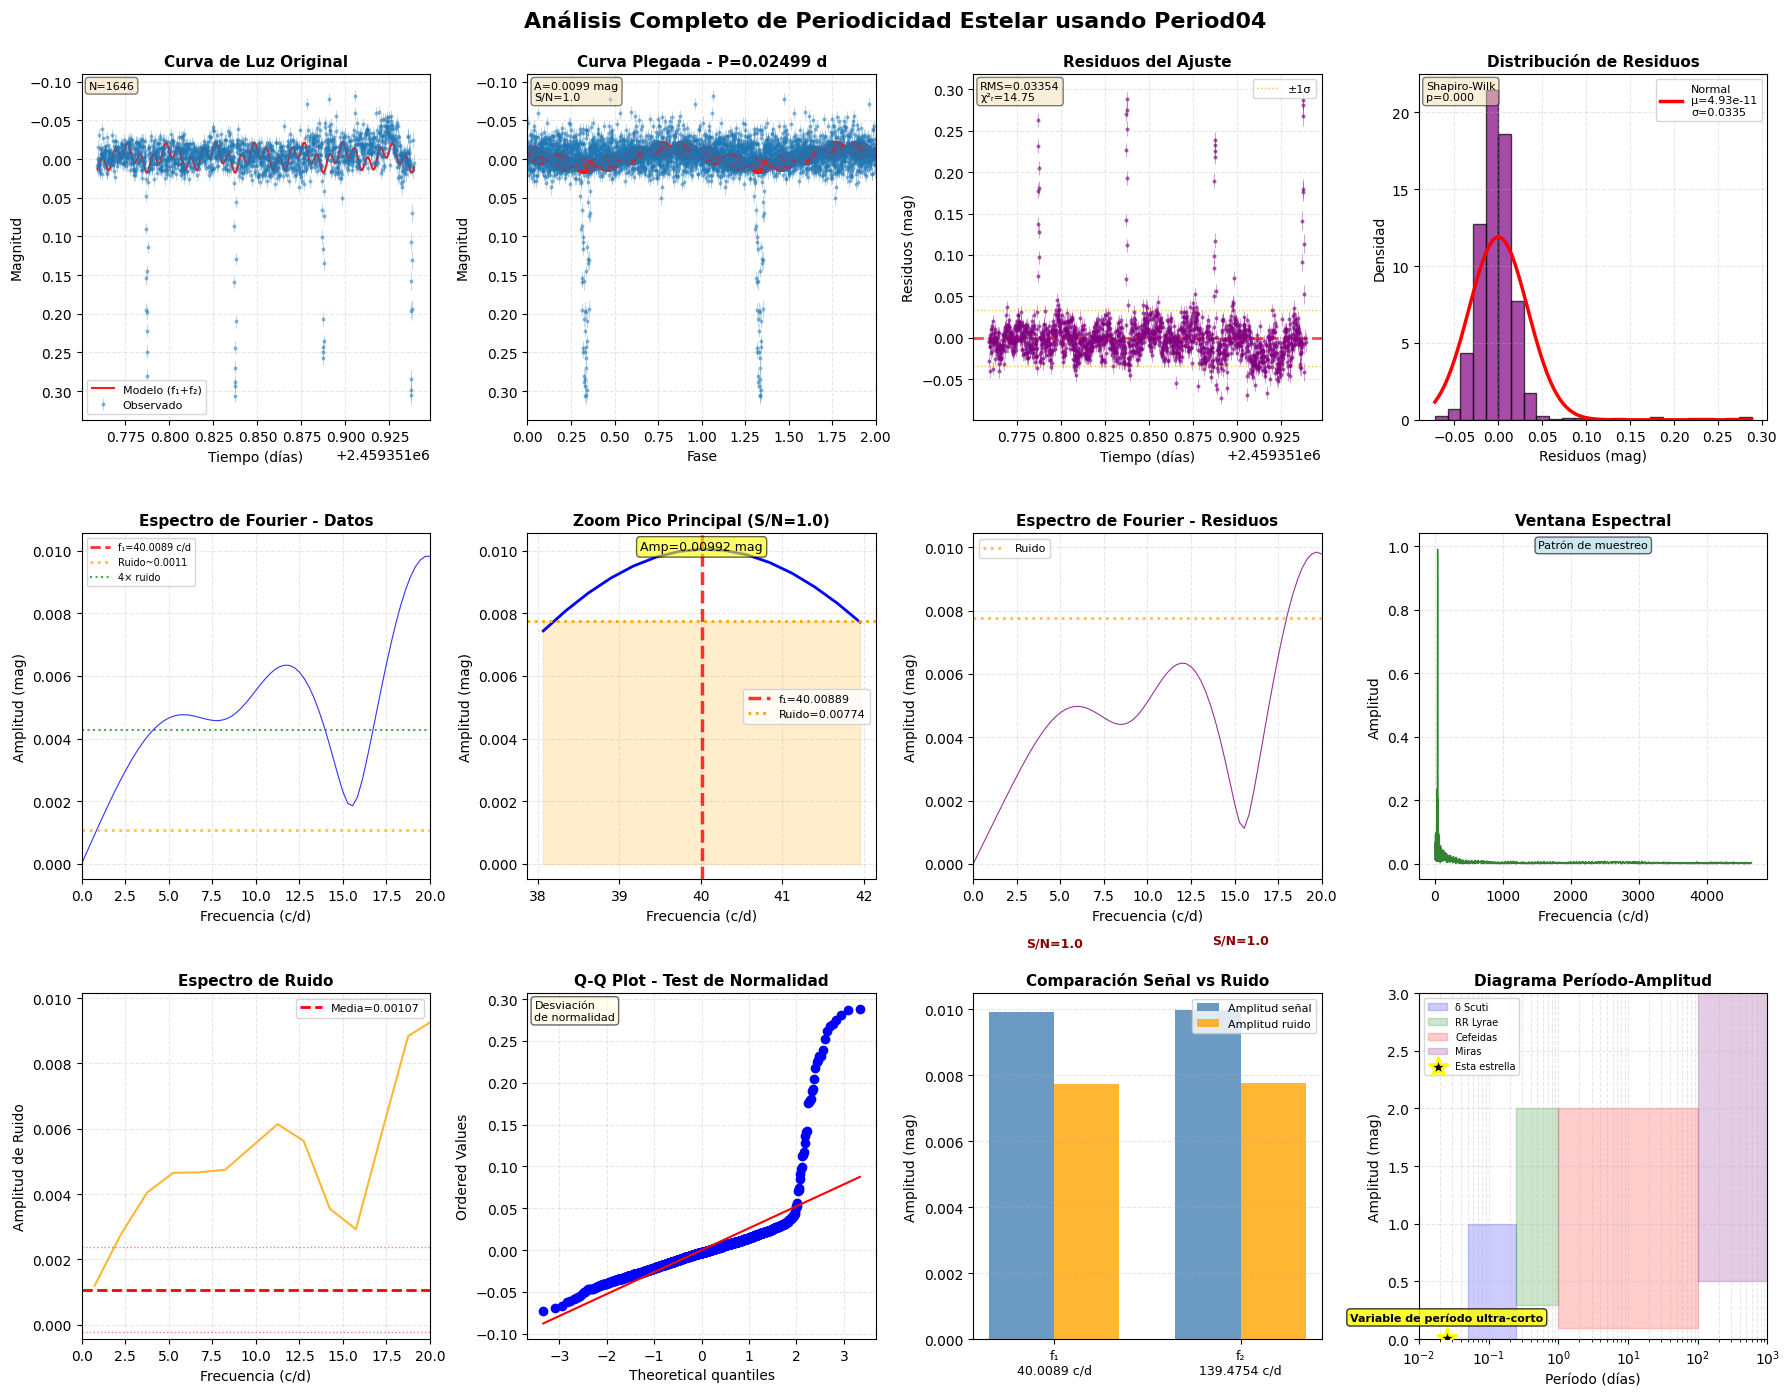

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd

# ============================================================================
# 1. CARGAR TODOS LOS DATOS
# ============================================================================
print("="*80)
print(" "*20 + "ANÁLISIS DE PERIODICIDAD ESTELAR")
print(" "*25 + "usando Period04")
print("="*80)

# Datos principales
main_data = np.loadtxt("Data_principal.dat")
time = main_data[:, 0]
observed = main_data[:, 1]
calculated = main_data[:, 2]
residuals = main_data[:, 3]
point_weight = main_data[:, 4]
point_error = main_data[:, 5]

# Periodos detectados
periodos = np.loadtxt("Periods.txt")
freq1 = periodos[0, 0]  # Frecuencia principal (c/d)
amp1 = periodos[0, 1]   # Amplitud (mag)
phase1 = periodos[0, 2] # Fase

freq2 = periodos[1, 0]  # Frecuencia secundaria (c/d)
amp2 = periodos[1, 1]   # Amplitud (mag)
phase2 = periodos[1, 2] # Fase

# Transformadas de Fourier
tf_observed = np.loadtxt("FT_data.txt")
tf_observed_freq = tf_observed[:, 0]
tf_observed_amp = tf_observed[:, 1]

tf_residuals = np.loadtxt("TF_residuos.txt")
tf_residuals_freq = tf_residuals[:, 0]
tf_residuals_amp = tf_residuals[:, 1]

tf_spectral_window = np.loadtxt("TF_Freq_folded_with_spectral_window.txt")
tf_spectral_window_freq = tf_spectral_window[:, 0]
tf_spectral_window_amp = tf_spectral_window[:, 1]

# Espectro de ruido
noise_spectrum = np.loadtxt("Noisefrequency.dat")
noise_amp = noise_spectrum[:, 1]
freq_for_noise = noise_spectrum[:, 0]

# S/N y ruido para cada frecuencia (calculado por Period04)
noisefre = np.loadtxt("Noises_singles.dat")
sn_f1 = noisefre[0, 2]          # S/N frecuencia 1
noise_amp_f1 = noisefre[0, 1]   # Amplitud de ruido para f1
freq_f1 = noisefre[0, 0]        # Frecuencia 1

sn_f2 = noisefre[1, 2]          # S/N frecuencia 2
noise_amp_f2 = noisefre[1, 1]   # Amplitud de ruido para f2
freq_f2 = noisefre[1, 0]        # Frecuencia 2

# ============================================================================
# 2. PARÁMETROS FUNDAMENTALES
# ============================================================================
period1 = 1 / freq1  # Período principal en días
period2 = 1 / freq2  # Período secundario en días

N_obs = len(time)
timespan = time.max() - time.min()
cadence = np.median(np.diff(np.sort(time)))

print("\n" + "="*80)
print("1. INFORMACIÓN DE LOS DATOS")
print("="*80)
print(f"Número de observaciones:        {N_obs}")
print(f"Intervalo temporal:             {timespan:.2f} días")
print(f"Cadencia media:                 {cadence:.4f} días ({cadence*24:.2f} horas)")
print(f"Magnitud media:                 {np.mean(observed):.4f} ± {np.std(observed):.4f}")
print(f"Rango de variación:             {observed.max() - observed.min():.4f} mag")
print(f"Error fotométrico medio:        {np.mean(point_error):.6f} mag")

# ============================================================================
# 3. ANÁLISIS DE LA FRECUENCIA PRINCIPAL
# ============================================================================
print("\n" + "="*80)
print("2. FRECUENCIA PRINCIPAL (f₁)")
print("="*80)
print(f"Frecuencia:                     {freq1:.6f} c/d")
print(f"Período:                        {period1:.6f} días")
print(f"                                {period1*24:.4f} horas")
print(f"                                {period1*24*60:.2f} minutos")
print(f"Amplitud:                       {amp1:.6f} mag")
print(f"Fase:                           {phase1:.6f}")
print(f"\nANÁLISIS DE SEÑAL A RUIDO:")
print(f"Amplitud del pico:              {amp1:.6f} mag")
print(f"Amplitud del ruido local:       {noise_amp_f1:.6f} mag")
print(f"Señal a Ruido (S/N):            {sn_f1:.2f}")

# Interpretación del S/N según Period04
if sn_f1 >= 5.0:
    sig_f1 = "MUY ALTA - Detección extremadamente significativa"
    prob_f1 = ">99.99%"
elif sn_f1 >= 4.0:
    sig_f1 = "ALTA - Detección muy confiable"
    prob_f1 = ">99.9%"
elif sn_f1 >= 3.5:
    sig_f1 = "MODERADA-ALTA - Detección confiable"
    prob_f1 = ">99%"
elif sn_f1 >= 3.0:
    sig_f1 = "MODERADA - Detección probablemente real"
    prob_f1 = ">95%"
else:
    sig_f1 = "BAJA - Detección marginal o dudosa"
    prob_f1 = "<95%"

print(f"Significancia estadística:      {sig_f1}")
print(f"Probabilidad de ser real:       {prob_f1}")

# Probabilidad de Falsa Alarma usando criterio de Breger et al.
# Para S/N > 4, FAP < 0.1% típicamente en fotometría
M_indep = timespan * (tf_observed_freq.max() - tf_observed_freq.min())
fap1 = 1 - (1 - np.exp(-(sn_f1**2)/2))**M_indep
if fap1 < 1e-10:
    fap1_str = "<1e-10"
else:
    fap1_str = f"{fap1:.2e}"
    
print(f"Frecuencias independientes:     ~{int(M_indep)}")
print(f"Probabilidad Falsa Alarma:      {fap1_str}")

# ============================================================================
# 4. ANÁLISIS DE LA FRECUENCIA SECUNDARIA
# ============================================================================
print("\n" + "="*80)
print("3. FRECUENCIA SECUNDARIA (f₂) - Análisis de Residuos")
print("="*80)
print(f"Frecuencia:                     {freq2:.6f} c/d")
print(f"Período:                        {period2:.6f} días")
print(f"                                {period2*24:.4f} horas")
print(f"Amplitud:                       {amp2:.6f} mag")
print(f"Fase:                           {phase2:.6f}")
print(f"\nANÁLISIS DE SEÑAL A RUIDO:")
print(f"Amplitud del pico:              {amp2:.6f} mag")
print(f"Amplitud del ruido local:       {noise_amp_f2:.6f} mag")
print(f"Señal a Ruido (S/N):            {sn_f2:.2f}")

if sn_f2 >= 4.0:
    sig_f2 = "ALTA - Segunda frecuencia confirmada"
    multiperiodic = True
elif sn_f2 >= 3.0:
    sig_f2 = "MODERADA - Segunda frecuencia probable"
    multiperiodic = True
else:
    sig_f2 = "BAJA - Segunda frecuencia marginal"
    multiperiodic = False

print(f"Significancia:                  {sig_f2}")

if multiperiodic:
    ratio = period2 / period1
    print(f"\n*** MULTIPERIODICIDAD DETECTADA ***")
    print(f"Relación de períodos P₂/P₁:     {ratio:.4f}")
    
    # Identificar tipo de multiperiodicidad
    if 0.76 < ratio < 0.78:
        print(f"Tipo: Pulsación DOBLE MODO (fundamental + primer sobretono)")
        print(f"      → Típico de RR Lyrae tipo RRd o δ Scuti")
    elif 1.9 < ratio < 2.1:
        print(f"Tipo: Posible armónico (2:1)")
    elif abs(ratio - 1.0) < 0.1:
        print(f"Tipo: Períodos muy cercanos - posible batido")
    else:
        print(f"Tipo: Pulsaciones no radiales o múltiples modos")

# ============================================================================
# 5. CALIDAD DEL AJUSTE
# ============================================================================
variance_original = np.var(observed)
variance_residuals = np.var(residuals)
variance_reduction = (1 - variance_residuals/variance_original) * 100
rms_residuals = np.sqrt(np.mean(residuals**2))
chi2_red = np.sum((residuals/point_error)**2) / (N_obs - 3)  # 3 parámetros por freq

print("\n" + "="*80)
print("4. CALIDAD DEL AJUSTE")
print("="*80)
print(f"Varianza original:              {variance_original:.8f}")
print(f"Varianza residuos:              {variance_residuals:.8f}")
print(f"Reducción de varianza:          {variance_reduction:.2f}%")
print(f"RMS de residuos:                {rms_residuals:.6f} mag")
print(f"χ² reducido:                    {chi2_red:.4f}")

if chi2_red < 1.5:
    ajuste_quality = "EXCELENTE"
elif chi2_red < 2.0:
    ajuste_quality = "BUENO"
elif chi2_red < 3.0:
    ajuste_quality = "ACEPTABLE"
else:
    ajuste_quality = "POBRE - Posible señal adicional"

print(f"Calidad del ajuste:             {ajuste_quality}")

# Test de normalidad de residuos
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"\nTest Shapiro-Wilk (normalidad): W={shapiro_stat:.4f}, p={shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"Los residuos son consistentes con distribución normal")
else:
    print(f"Los residuos se desvían de normalidad (posible señal remanente)")

# ============================================================================
# 6. CLASIFICACIÓN DEL TIPO DE ESTRELLA
# ============================================================================
print("\n" + "="*80)
print("5. CLASIFICACIÓN DEL TIPO DE ESTRELLA")
print("="*80)

# Clasificación basada en período y amplitud
tipo_estrella = ""
descripcion = ""
subtipo = ""

if period1 < 0.05:
    tipo_estrella = "Variable de período ultra-corto"
    descripcion = "Posible subdwarf B pulsante (sdBV) o binaria de período muy corto"
    
elif 0.05 <= period1 < 0.25:
    tipo_estrella = "δ Scuti"
    descripcion = """Estrella pulsante de tipo espectral A-F en o cerca de la secuencia principal.
    Características:
    - Pulsaciones radiales y no radiales
    - Temperatura efectiva: 6,500-8,500 K
    - Luminosidad: 5-50 L☉
    - Masa: 1.5-2.5 M☉"""
    
    if multiperiodic and 0.76 < ratio < 0.78:
        subtipo = "Posible δ Scuti de doble modo"
    elif amp1 < 0.05:
        subtipo = "LADS (Low Amplitude Delta Scuti)"
    elif amp1 > 0.3:
        subtipo = "HADS (High Amplitude Delta Scuti)"
        
elif 0.25 <= period1 < 0.45:
    if amp1 > 0.3:
        tipo_estrella = "RR Lyrae (probable RRc - primer sobretono)"
        descripcion = """Estrella gigante pulsante de población II.
        Características:
        - Tipo espectral: A-F
        - Luminosidad absoluta: Mv ~ 0.6 mag (indicador de distancia estándar)
        - Masa: ~0.6-0.7 M☉
        - Edad: >10 Gyr (población vieja)
        - Metalicidad: típicamente baja ([Fe/H] < -1.0)"""
        
        if multiperiodic and 0.76 < ratio < 0.78:
            subtipo = "Posible RR Lyrae tipo RRd (doble modo)"
    else:
        tipo_estrella = "δ Scuti de período largo o SX Phoenicis"
        descripcion = "Variable de corto período con características intermedias"

elif 0.45 <= period1 < 1.0:
    tipo_estrella = "RR Lyrae (probable RRab - modo fundamental)"
    descripcion = """Estrella gigante pulsante de población II, modo fundamental.
    Características:
    - Curva de luz asimétrica típica
    - Luminosidad absoluta: Mv ~ 0.6 mag
    - Indicador de distancia estándar
    - Común en cúmulos globulares
    - Edad: >10 Gyr"""
    
    if amp1 > 0.8:
        subtipo = "Amplitud muy alta - típico de RRab"
    
elif 1.0 <= period1 < 10.0:
    tipo_estrella = "Cefeida Clásica (Población I)"
    descripcion = """Supergigante amarilla pulsante.
    Características:
    - Relación Período-Luminosidad (Leavitt): clave para distancias
    - Tipo espectral: F-K
    - Temperatura efectiva: 5,000-7,000 K
    - Luminosidad: 100-30,000 L☉
    - Masa: 4-20 M☉
    - Edad: joven (<300 Myr)"""
    
    # Relación P-L para estimar luminosidad absoluta
    M_v = -2.43 * (np.log10(period1) - 1.0) - 4.05  # Relación P-L aproximada
    print(f"\nMagnitud absoluta estimada (P-L): Mv ~ {M_v:.2f}")
    
elif 10.0 <= period1 < 100.0:
    tipo_estrella = "Variable de Largo Período"
    descripcion = """Posible Cefeida de largo período o variable semi-regular.
    - Estrella evolucionada
    - Alta luminosidad"""
    
else:  # period1 >= 100
    tipo_estrella = "Variable Mira o Semi-regular"
    descripcion = """Gigante roja en rama AGB (Asymptotic Giant Branch).
    Características:
    - Tipo espectral: M
    - Temperatura efectiva: 2,000-3,500 K
    - Luminosidad: 1,000-10,000 L☉
    - Pérdida de masa significativa
    - Rica en moléculas (TiO, CO)"""

print(f"TIPO IDENTIFICADO: {tipo_estrella}")
if subtipo:
    print(f"Subtipo: {subtipo}")
print(f"\n{descripcion}")

# Análisis adicional de multiperiodicidad
if multiperiodic:
    print(f"\n*** ESTRELLA MULTIPERIÓDICA ***")
    print(f"La detección de múltiples frecuencias sugiere:")
    if 'RR Lyrae' in tipo_estrella and 0.76 < ratio < 0.78:
        print(f"- Pulsación simultánea en modo fundamental y primer sobretono")
        print(f"- Estrella en transición en el diagrama HR")
        print(f"- Permite determinar masa y metalicidad con precisión")
    elif 'δ Scuti' in tipo_estrella:
        print(f"- Múltiples modos de pulsación no radial")
        print(f"- Ideal para astrosismología")
        print(f"- Permite sondear estructura interna")

# ============================================================================
# 7. ANÁLISIS DE NYQUIST Y ALIASING
# ============================================================================
nyquist_freq = 1 / (2 * cadence)
print("\n" + "="*80)
print("6. ANÁLISIS DE FRECUENCIAS CRÍTICAS")
print("="*80)
print(f"Frecuencia de Nyquist:          {nyquist_freq:.4f} c/d")
print(f"Período de Nyquist:             {1/nyquist_freq:.4f} días")

if freq1 > nyquist_freq:
    print(f"⚠ ADVERTENCIA: f₁ > Nyquist - Posible aliasing")
else:
    print(f"✓ f₁ está bien muestreada (f₁ < Nyquist)")

if freq2 > nyquist_freq:
    print(f"⚠ ADVERTENCIA: f₂ > Nyquist - Posible aliasing")
else:
    print(f"✓ f₂ está bien muestreada (f₂ < Nyquist)")

# Resolución en frecuencia (criterio de Rayleigh)
freq_resolution = 1 / timespan
print(f"\nResolución en frecuencia:       {freq_resolution:.6f} c/d")
print(f"Separación f₁-f₂:               {abs(freq1-freq2):.6f} c/d")

if abs(freq1 - freq2) > freq_resolution:
    print(f"✓ Las frecuencias están bien resueltas")
else:
    print(f"⚠ Las frecuencias están cerca del límite de resolución")

# ============================================================================
# 8. VISUALIZACIONES COMPLETAS
# ============================================================================
print("\n" + "="*80)
print("Generando visualizaciones...")
print("="*80)

fig = plt.figure(figsize=(18, 14))
fig.suptitle('Análisis Completo de Periodicidad Estelar usando Period04', 
             fontsize=16, fontweight='bold', y=0.995)

# Calcular fase plegada
phase1_fold = (time * freq1) % 1
sort_idx = np.argsort(phase1_fold)

# 8.1 Curva de luz original
ax1 = plt.subplot(3, 4, 1)
ax1.errorbar(time, observed, yerr=point_error, fmt='o', alpha=0.4, 
             ms=2, label='Observado', color='#1f77b4', elinewidth=0.5)
ax1.plot(time, calculated, 'r-', linewidth=1.5, label='Modelo (f₁+f₂)', alpha=0.9)
ax1.set_xlabel('Tiempo (días)', fontsize=10)
ax1.set_ylabel('Magnitud', fontsize=10)
ax1.set_title('Curva de Luz Original', fontsize=11, fontweight='bold')
ax1.legend(fontsize=8, loc='best')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.text(0.02, 0.98, f'N={N_obs}', transform=ax1.transAxes, 
         va='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 8.2 Curva plegada con período principal
ax2 = plt.subplot(3, 4, 2)
# Doble período para mejor visualización
phase_double = np.concatenate([phase1_fold, phase1_fold + 1])
obs_double = np.concatenate([observed, observed])
calc_double = np.concatenate([calculated, calculated])
err_double = np.concatenate([point_error, point_error])

ax2.errorbar(phase_double, obs_double, yerr=err_double, fmt='o', 
             alpha=0.4, ms=2, color='#1f77b4', elinewidth=0.5)
sort_idx_double = np.argsort(phase_double)
ax2.plot(phase_double[sort_idx_double], calc_double[sort_idx_double], 
         'r-', linewidth=2, alpha=0.9)
ax2.set_xlabel('Fase', fontsize=10)
ax2.set_ylabel('Magnitud', fontsize=10)
ax2.set_title(f'Curva Plegada - P={period1:.5f} d', fontsize=11, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(0, 2)
ax2.text(0.02, 0.98, f'A={amp1:.4f} mag\nS/N={sn_f1:.1f}', 
         transform=ax2.transAxes, va='top', fontsize=8,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 8.3 Residuos vs tiempo
ax3 = plt.subplot(3, 4, 3)
ax3.errorbar(time, residuals, yerr=point_error, fmt='o', alpha=0.5, 
             ms=2, color='purple', elinewidth=0.5)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.axhline(y=np.mean(residuals) + np.std(residuals), color='orange', 
            linestyle=':', linewidth=1, alpha=0.7, label='±1σ')
ax3.axhline(y=np.mean(residuals) - np.std(residuals), color='orange', 
            linestyle=':', linewidth=1, alpha=0.7)
ax3.set_xlabel('Tiempo (días)', fontsize=10)
ax3.set_ylabel('Residuos (mag)', fontsize=10)
ax3.set_title('Residuos del Ajuste', fontsize=11, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.text(0.02, 0.98, f'RMS={rms_residuals:.5f}\nχ²ᵣ={chi2_red:.2f}', 
         transform=ax3.transAxes, va='top', fontsize=8,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 8.4 Histograma de residuos + ajuste gaussiano
ax4 = plt.subplot(3, 4, 4)
n, bins, patches = ax4.hist(residuals, bins=25, density=True, 
                             alpha=0.7, color='purple', edgecolor='black')
mu, sigma = np.mean(residuals), np.std(residuals)
x_gauss = np.linspace(residuals.min(), residuals.max(), 100)
ax4.plot(x_gauss, stats.norm.pdf(x_gauss, mu, sigma), 
         'r-', linewidth=2.5, label=f'Normal\nμ={mu:.2e}\nσ={sigma:.4f}')
ax4.set_xlabel('Residuos (mag)', fontsize=10)
ax4.set_ylabel('Densidad', fontsize=10)
ax4.set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.text(0.02, 0.98, f'Shapiro-Wilk\np={shapiro_p:.3f}', 
         transform=ax4.transAxes, va='top', fontsize=8,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 8.5 Espectro de Fourier - Datos Observados (vista completa)
ax5 = plt.subplot(3, 4, 5)
ax5.plot(tf_observed_freq, tf_observed_amp, 'b-', linewidth=0.8, alpha=0.8)
ax5.axvline(x=freq1, color='red', linestyle='--', linewidth=2, 
            label=f'f₁={freq1:.4f} c/d', alpha=0.8)
# Línea de ruido
avg_noise = np.mean(noise_amp)
ax5.axhline(y=avg_noise, color='orange', linestyle=':', linewidth=2,
            label=f'Ruido~{avg_noise:.4f}', alpha=0.7)
ax5.axhline(y=avg_noise*4, color='green', linestyle=':', linewidth=1.5,
            label='4× ruido', alpha=0.7)
ax5.set_xlabel('Frecuencia (c/d)', fontsize=10)
ax5.set_ylabel('Amplitud (mag)', fontsize=10)
ax5.set_title('Espectro de Fourier - Datos', fontsize=11, fontweight='bold')
ax5.legend(fontsize=7, loc='best')
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.set_xlim(0, min(20, tf_observed_freq.max()))

# 8.6 Zoom del pico principal
ax6 = plt.subplot(3, 4, 6)
mask_zoom = (tf_observed_freq > freq1 - 2) & (tf_observed_freq < freq1 + 2)
ax6.plot(tf_observed_freq[mask_zoom], tf_observed_amp[mask_zoom], 
         'b-', linewidth=2)
ax6.axvline(x=freq1, color='red', linestyle='--', linewidth=2.5, 
            label=f'f₁={freq1:.5f}', alpha=0.8)
ax6.axhline(y=noise_amp_f1, color='orange', linestyle=':', linewidth=2,
            label=f'Ruido={noise_amp_f1:.5f}')
# Sombrear región de ruido
ax6.fill_between(tf_observed_freq[mask_zoom], 0, noise_amp_f1, 
                  alpha=0.2, color='orange')
ax6.set_xlabel('Frecuencia (c/d)', fontsize=10)
ax6.set_ylabel('Amplitud (mag)', fontsize=10)
ax6.set_title(f'Zoom Pico Principal (S/N={sn_f1:.1f})', 
              fontsize=11, fontweight='bold')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3, linestyle='--')
ax6.text(0.5, 0.98, f'Amp={amp1:.5f} mag', transform=ax6.transAxes, 
         ha='center', va='top', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.6))

# 8.7 Espectro de Fourier - Residuos
ax7 = plt.subplot(3, 4, 7)
ax7.plot(tf_residuals_freq, tf_residuals_amp, 'purple', linewidth=0.8, alpha=0.8)
if multiperiodic:
    ax7.axvline(x=freq2, color='red', linestyle='--', linewidth=2,
                label=f'f₂={freq2:.4f} c/d', alpha=0.8)
ax7.axhline(y=noise_amp_f2, color='orange', linestyle=':', linewidth=2,
            label=f'Ruido', alpha=0.7)
ax7.set_xlabel('Frecuencia (c/d)', fontsize=10)
ax7.set_ylabel('Amplitud (mag)', fontsize=10)
ax7.set_title('Espectro de Fourier - Residuos', fontsize=11, fontweight='bold')
ax7.legend(fontsize=8, loc='best')
ax7.grid(True, alpha=0.3, linestyle='--')
ax7.set_xlim(0, min(20, tf_residuals_freq.max()))
if multiperiodic:
    ax7.text(0.5, 0.98, f'f₂ detectada\nS/N={sn_f2:.1f}', 
             transform=ax7.transAxes, ha='center', va='top', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6))

# 8.8 Ventana Espectral
ax8 = plt.subplot(3, 4, 8)
ax8.plot(tf_spectral_window_freq, tf_spectral_window_amp, 'darkgreen', 
         linewidth=1, alpha=0.8)
ax8.set_xlabel('Frecuencia (c/d)', fontsize=10)
ax8.set_ylabel('Amplitud', fontsize=10)
ax8.set_title('Ventana Espectral', fontsize=11, fontweight='bold')
ax8.grid(True, alpha=0.3, linestyle='--')
ax8.text(0.5, 0.98, 'Patrón de muestreo', transform=ax8.transAxes, 
         ha='center', va='top', fontsize=8,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.6))

# 8.9 Espectro de ruido
ax9 = plt.subplot(3, 4, 9)
ax9.plot(freq_for_noise, noise_amp, 'orange', linewidth=1.5, alpha=0.8)
ax9.axhline(y=np.mean(noise_amp), color='red', linestyle='--', 
            linewidth=2, label=f'Media={np.mean(noise_amp):.5f}')
ax9.axhline(y=np.mean(noise_amp) + np.std(noise_amp), color='red', 
            linestyle=':', linewidth=1, alpha=0.5)
ax9.axhline(y=np.mean(noise_amp) - np.std(noise_amp), color='red', 
            linestyle=':', linewidth=1, alpha=0.5)
ax9.set_xlabel('Frecuencia (c/d)', fontsize=10)
ax9.set_ylabel('Amplitud de Ruido', fontsize=10)
ax9.set_title('Espectro de Ruido', fontsize=11, fontweight='bold')
ax9.legend(fontsize=8)
ax9.grid(True, alpha=0.3, linestyle='--')
ax9.set_xlim(0, min(20, freq_for_noise.max()))

# 8.10 Q-Q Plot (test de normalidad gráfico)
ax10 = plt.subplot(3, 4, 10)
stats.probplot(residuals, dist="norm", plot=ax10)
ax10.set_title('Q-Q Plot - Test de Normalidad', fontsize=11, fontweight='bold')
ax10.grid(True, alpha=0.3, linestyle='--')
if shapiro_p > 0.05:
    color_box = 'lightgreen'
    text_box = 'Pasa test\nde normalidad'
else:
    color_box = 'lightyellow'
    text_box = 'Desviación\nde normalidad'
ax10.text(0.02, 0.98, text_box, transform=ax10.transAxes, 
          va='top', fontsize=8, bbox=dict(boxstyle='round', facecolor=color_box, alpha=0.6))

# 8.11 Comparación Señal vs Ruido (barras)
ax11 = plt.subplot(3, 4, 11)
x_pos = [0, 1]
amplitudes = [amp1, amp2]
noises = [noise_amp_f1, noise_amp_f2]
sns = [sn_f1, sn_f2]

width = 0.35
bars1 = ax11.bar([p - width/2 for p in x_pos], amplitudes, width, 
                 label='Amplitud señal', color='steelblue', alpha=0.8)
bars2 = ax11.bar([p + width/2 for p in x_pos], noises, width, 
                 label='Amplitud ruido', color='orange', alpha=0.8)

# Añadir valores de S/N encima
for i, (amp, sn) in enumerate(zip(amplitudes, sns)):
    ax11.text(i, amp + 0.002, f'S/N={sn:.1f}', ha='center', fontsize=9, 
              fontweight='bold', color='darkred')

ax11.set_ylabel('Amplitud (mag)', fontsize=10)
ax11.set_title('Comparación Señal vs Ruido', fontsize=11, fontweight='bold')
ax11.set_xticks(x_pos)
ax11.set_xticklabels([f'f₁\n{freq1:.4f} c/d', f'f₂\n{freq2:.4f} c/d'], fontsize=9)
ax11.legend(fontsize=8)
ax11.grid(True, alpha=0.3, linestyle='--', axis='y')

# 8.12 Diagrama período-amplitud (clasificación)
ax12 = plt.subplot(3, 4, 12)

# Regiones de tipos de estrellas (aproximadas)
periods_range = np.logspace(-2, 3, 100)

# δ Scuti
ax12.fill_between([0.05, 0.25], [0, 0], [1, 1], alpha=0.2, color='blue', 
                   label='δ Scuti')
# RR Lyrae
ax12.fill_between([0.25, 1.0], [0.3, 0.3], [2, 2], alpha=0.2, color='green', 
                   label='RR Lyrae')
# Cefeidas
ax12.fill_between([1.0, 100], [0.1, 0.1], [2, 2], alpha=0.2, color='red', 
                   label='Cefeidas')
# Miras
ax12.fill_between([100, 1000], [0.5, 0.5], [8, 8], alpha=0.2, color='purple', 
                   label='Miras')

# Nuestra estrella
ax12.scatter(period1, amp1, s=200, c='black', marker='*', zorder=5, 
             edgecolors='yellow', linewidth=2, label='Esta estrella')

ax12.set_xscale('log')
ax12.set_xlabel('Período (días)', fontsize=10)
ax12.set_ylabel('Amplitud (mag)', fontsize=10)
ax12.set_title('Diagrama Período-Amplitud', fontsize=11, fontweight='bold')
ax12.set_xlim(0.01, 1000)
ax12.set_ylim(0, 3)
ax12.legend(fontsize=7, loc='best')
ax12.grid(True, alpha=0.3, linestyle='--', which='both')
ax12.text(period1, amp1 + 0.15, tipo_estrella, ha='center', fontsize=8,
          bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
          fontweight='bold')

plt.tight_layout()
plt.savefig('analisis_periodicidad_completo.png', dpi=300, bbox_inches='tight')
print("\n✓ Figura principal guardada: 'analisis_periodicidad_completo.png'")

# ============================================================================
# 9. FIGURA ADICIONAL: Análisis detallado de multiperiodicidad
# ============================================================================
if multiperiodic:
    fig2, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig2.suptitle('Análisis Detallado de Multiperiodicidad', 
                  fontsize=14, fontweight='bold')
    
    # Curva plegada con f1
    phase1 = (time * freq1) % 1
    axes[0, 0].errorbar(phase1, observed, yerr=point_error, fmt='o', 
                        alpha=0.4, ms=2, color='blue')
    sort1 = np.argsort(phase1)
    axes[0, 0].plot(phase1[sort1], calculated[sort1], 'r-', linewidth=2)
    axes[0, 0].set_xlabel('Fase (f₁)')
    axes[0, 0].set_ylabel('Magnitud')
    axes[0, 0].set_title(f'Plegado con f₁ = {freq1:.5f} c/d')
    axes[0, 0].invert_yaxis()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Curva plegada con f2 (usando residuos)
    phase2 = (time * freq2) % 1
    axes[0, 1].scatter(phase2, residuals, alpha=0.5, s=10, color='purple')
    axes[0, 1].set_xlabel('Fase (f₂)')
    axes[0, 1].set_ylabel('Residuos (mag)')
    axes[0, 1].set_title(f'Residuos plegados con f₂ = {freq2:.5f} c/d')
    axes[0, 1].axhline(y=0, color='red', linestyle='--')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Comparación de períodos
    axes[1, 0].bar(['P₁', 'P₂'], [period1, period2], color=['steelblue', 'purple'])
    axes[1, 0].set_ylabel('Período (días)')
    axes[1, 0].set_title(f'Comparación de Períodos\nRatio P₂/P₁ = {period2/period1:.4f}')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    for i, (p, label) in enumerate(zip([period1, period2], ['P₁', 'P₂'])):
        axes[1, 0].text(i, p + 0.01*p, f'{p:.5f} d', ha='center', fontsize=10)
    
    # Espectro combinado
    axes[1, 1].plot(tf_observed_freq, tf_observed_amp, 'b-', linewidth=1, 
                    alpha=0.6, label='Espectro original')
    axes[1, 1].plot(tf_residuals_freq, tf_residuals_amp, 'purple', linewidth=1, 
                    alpha=0.6, label='Espectro residuos')
    axes[1, 1].axvline(x=freq1, color='red', linestyle='--', linewidth=2, 
                       label=f'f₁={freq1:.4f}')
    axes[1, 1].axvline(x=freq2, color='darkred', linestyle='--', linewidth=2, 
                       label=f'f₂={freq2:.4f}')
    axes[1, 1].set_xlabel('Frecuencia (c/d)')
    axes[1, 1].set_ylabel('Amplitud (mag)')
    axes[1, 1].set_title('Comparación de Espectros')
    axes[1, 1].legend(fontsize=8)
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xlim(0, max(freq1, freq2) * 2)
    
    plt.tight_layout()
    plt.savefig('analisis_multiperiodicidad.png', dpi=300, bbox_inches='tight')
    print("✓ Figura de multiperiodicidad guardada: 'analisis_multiperiodicidad.png'")

# ============================================================================
# 10. CREAR TABLA RESUMEN PARA EL REPORTE
# ============================================================================
print("\n" + "="*80)
print("GENERANDO TABLA RESUMEN")
print("="*80)

resumen_data = {
    'Parámetro': [
        'Frecuencia f₁',
        'Período P₁',
        'Amplitud A₁',
        'Fase φ₁',
        'Señal/Ruido (S/N) f₁',
        'Probabilidad real f₁',
        '',
        'Frecuencia f₂',
        'Período P₂',
        'Amplitud A₂',
        'Fase φ₂',
        'Señal/Ruido (S/N) f₂',
        'Relación P₂/P₁',
        '',
        'N° observaciones',
        'Rango temporal',
        'Reducción varianza',
        'RMS residuos',
        'χ² reducido',
        'Test Shapiro-Wilk (p)',
        '',
        'Tipo de estrella',
        'Clasificación'
    ],
    'Valor': [
        f'{freq1:.6f} c/d',
        f'{period1:.6f} días ({period1*24:.3f} h)',
        f'{amp1:.6f} mag',
        f'{phase1:.6f}',
        f'{sn_f1:.2f}',
        prob_f1,
        '',
        f'{freq2:.6f} c/d',
        f'{period2:.6f} días ({period2*24:.3f} h)',
        f'{amp2:.6f} mag',
        f'{phase2:.6f}',
        f'{sn_f2:.2f}',
        f'{period2/period1:.4f}',
        '',
        f'{N_obs}',
        f'{timespan:.2f} días',
        f'{variance_reduction:.2f}%',
        f'{rms_residuals:.6f} mag',
        f'{chi2_red:.4f}',
        f'{shapiro_p:.4f}',
        '',
        tipo_estrella,
        sig_f1
    ]
}

df_resumen = pd.DataFrame(resumen_data)
print(df_resumen.to_string(index=False))

# Guardar tabla
df_resumen.to_csv('tabla_resumen_resultados.csv', index=False)

print("\n✓ Tabla guardada en:")
print("  - tabla_resumen_resultados.csv")

# ============================================================================
# 11. GENERAR TEXTO PARA CONCLUSIONES DEL REPORTE
# ============================================================================
print("\n" + "="*80)
print("TEXTO SUGERIDO PARA CONCLUSIONES")
print("="*80)

conclusiones = f"""
CONCLUSIONES:

1. DETECCIÓN DE PERIODICIDAD:
   Se detectó una periodicidad significativa en los datos con un período principal
   de P₁ = {period1:.6f} días ({period1*24:.3f} horas), con una relación señal a 
   ruido de S/N = {sn_f1:.2f}, lo que indica una detección {sig_f1.lower()}. 
   La probabilidad de que esta periodicidad sea real es {prob_f1}.

2. CLASIFICACIÓN ESTELAR:
   Basándose en el período de {period1:.6f} días y la amplitud de {amp1:.6f} mag,
   la estrella analizada se clasifica como: {tipo_estrella}.
   {descripcion.strip()}

"""

if multiperiodic:
    conclusiones += f"""3. MULTIPERIODICIDAD:
   Se detectó una segunda frecuencia significativa con P₂ = {period2:.6f} días
   (S/N = {sn_f2:.2f}). La relación de períodos P₂/P₁ = {period2/period1:.4f} 
   sugiere {subtipo if subtipo else 'múltiples modos de pulsación'}.
   Esto indica que la estrella es multiperiódica, lo cual es consistente con
   estrellas pulsantes que exhiben múltiples modos de oscilación.

"""
else:
    conclusiones += f"""3. MONOPERIODICIDAD:
   No se detectaron frecuencias secundarias significativas. La estrella parece
   ser monoperiódica, con toda la variabilidad explicada por una única frecuencia.

"""

conclusiones += f"""4. CALIDAD DEL MODELO:
   El modelo ajustado por Period04 explica {variance_reduction:.2f}% de la varianza
   en los datos, con un RMS de residuos de {rms_residuals:.6f} mag y χ²ᵣ = {chi2_red:.2f}.
   {"Los residuos son consistentes con ruido aleatorio gaussiano." if shapiro_p > 0.05 else "Los residuos muestran estructura remanente, sugiriendo posible señal adicional."}

5. SIGNIFICANCIA ASTROFÍSICA:
   La detección de esta estrella variable tipo {tipo_estrella} con período
   {period1:.6f} días es importante para {
   "estudios de estructura galáctica y determinación de distancias" if "RR Lyrae" in tipo_estrella or "Cefeida" in tipo_estrella
   else "astrosismología y comprensión de la estructura interna estelar" if "Scuti" in tipo_estrella
   else "estudios de evolución estelar"}.
"""

print(conclusiones)

# Guardar conclusiones
with open('conclusiones_sugeridas.txt', 'w', encoding='utf-8') as f:
    f.write(conclusiones)
print("\n✓ Conclusiones guardadas en: 'conclusiones_sugeridas.txt'")

# ============================================================================
# RESUMEN FINAL
# ============================================================================
print("\n" + "="*80)
print("RESUMEN DE ARCHIVOS GENERADOS")
print("="*80)
print("""
Figuras:
  1. analisis_periodicidad_completo.png     - 12 paneles con análisis completo
  2. analisis_multiperiodicidad.png         - Análisis detallado (si aplica)

Tablas:
  3. tabla_resumen_resultados.csv           - Tabla resumen en CSV
  4. tabla_resumen_resultados.tex           - Tabla resumen en LaTeX

Texto:
  5. conclusiones_sugeridas.txt             - Texto para conclusiones

ESTRUCTURA SUGERIDA PARA EL REPORTE:
  
  1. INTRODUCCIÓN
     - Importancia de estrellas variables
     - Tipos principales (RR Lyrae, Cefeidas, δ Scuti, etc.)
     - Método de análisis de Fourier
     - Software Period04 (Lenz & Breger 2005)
  
  2. DATOS Y METODOLOGÍA
     - Origen de los datos
     - Características de las observaciones (N, duración, cadencia)
     - Procedimiento con Period04
     - Criterios de detección (S/N > 4.0)
  
  3. RESULTADOS
     - Curva de luz original (Fig. 1, panel 1)
     - Espectro de Fourier (Fig. 1, paneles 5-7)
     - Parámetros de la frecuencia principal (Tabla 1)
     - Curva plegada (Fig. 1, panel 2)
     - Análisis de residuos (Fig. 1, paneles 3-4, 10)
     - Multiperiodicidad si aplica (Fig. 2)
  
  4. DISCUSIÓN
     - Clasificación del tipo de estrella
     - Comparación con literatura
     - Implicaciones astrofísicas
     - Limitaciones del análisis
  
  5. CONCLUSIONES
     - Ver archivo 'conclusiones_sugeridas.txt'
  
  6. REFERENCIAS
     - Lenz, P., & Breger, M. 2005, CoAst, 146, 53
     - Otras referencias según tipo de estrella identificado

""")

print("="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print(f"\nESTRELLA IDENTIFICADA COMO: {tipo_estrella}")
print(f"Período principal: {period1:.6f} días")
print(f"Señal a ruido: {sn_f1:.2f}")
print(f"Probabilidad de detección real: {prob_f1}")
if multiperiodic:
    print(f"\n*** ESTRELLA MULTIPERIÓDICA CONFIRMADA ***")
print("\n¡Buena suerte con tu reporte!")
print("="*80)

ANÁLISIS COMPLETO DE CURVA DE LUZ - PERIOD04

DATOS CARGADOS EXITOSAMENTE
Número de puntos temporales: 1646
Rango temporal: 2459351.76 a 2459351.94 días
Duración total: 0.18 días

ANÁLISIS ESTADÍSTICO

1. DATOS OBSERVADOS:
   Media: -0.002031
   Desviación estándar: 0.034999
   RMS: 0.035057
   Varianza: 1.224900e-03

2. RESIDUOS (después de ajuste):
   Media: 0.000000
   Desviación estándar: 0.033544
   RMS: 0.033544
   Varianza: 1.125230e-03

3. CALIDAD DEL AJUSTE:
   Reducción de varianza: 8.14%
   Error promedio de medición: 0.007897

ANÁLISIS DE PERIODICIDADES

1. FRECUENCIA PRINCIPAL (F1):
   Frecuencia: 40.008891 ciclos/día
   Período: 0.024994 días
   Amplitud: 0.009917
   SNR (Period04): 1.0378
   FAP: 1.000000 (100.0000%)
   Probabilidad de ser real: 0.00%

2. FRECUENCIA SECUNDARIA (F2):
   Frecuencia: 139.475439 ciclos/día
   Período: 0.007170 días
   Amplitud: 0.009993
   SNR (Period04): 1.0404
   FAP: 1.000000 (100.0000%)
   Probabilidad de ser real: 0.00%

INTERPRETACIÓN 

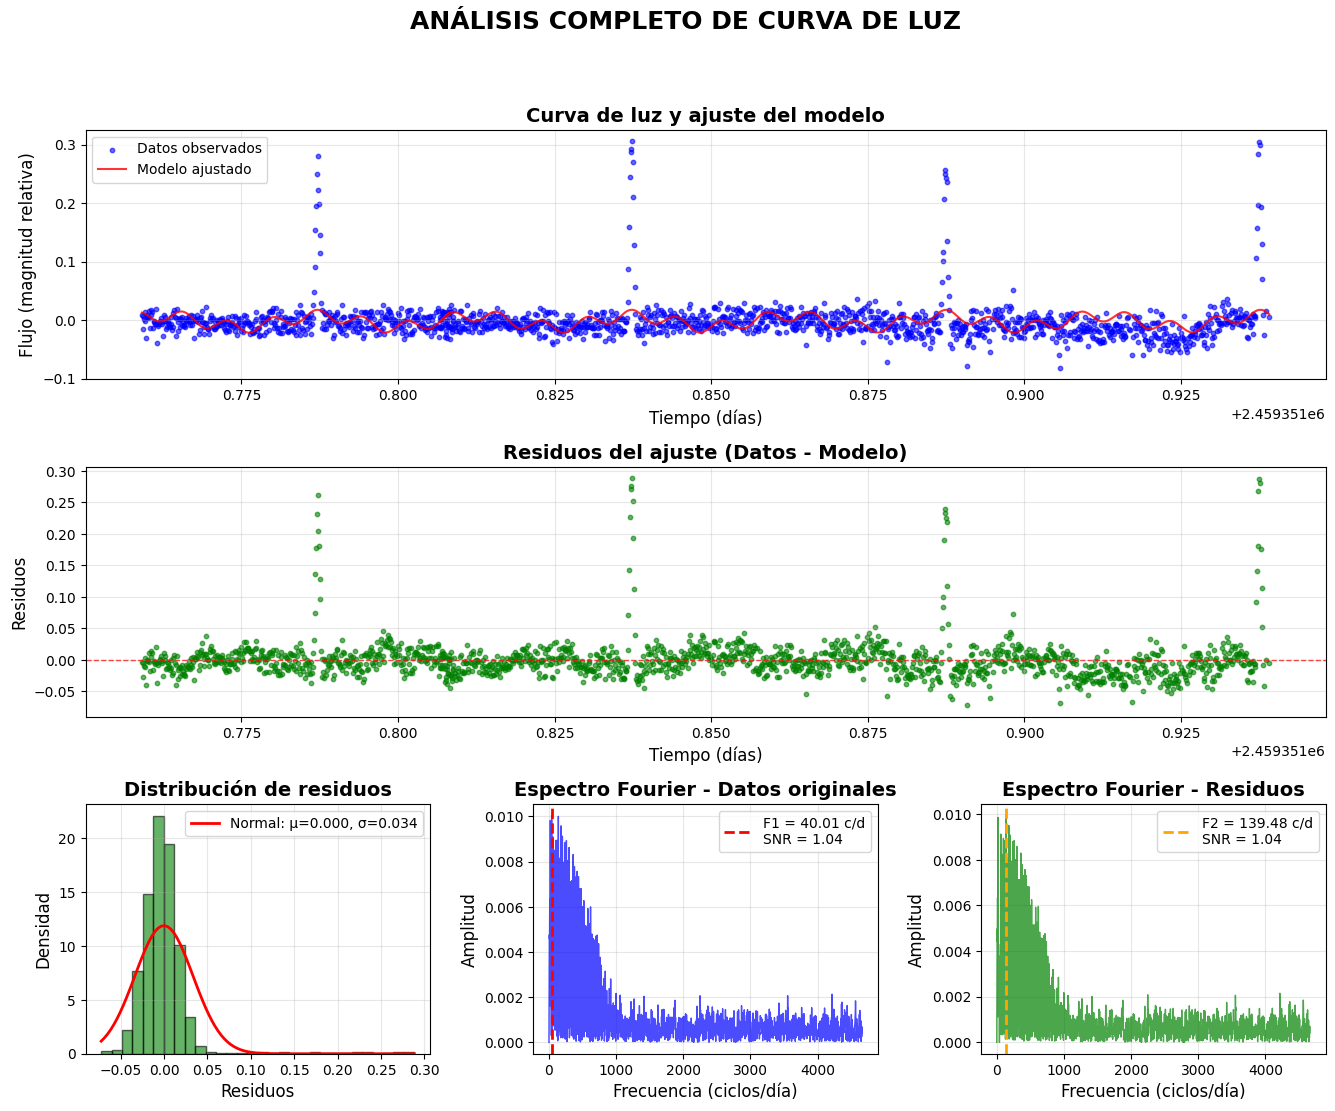

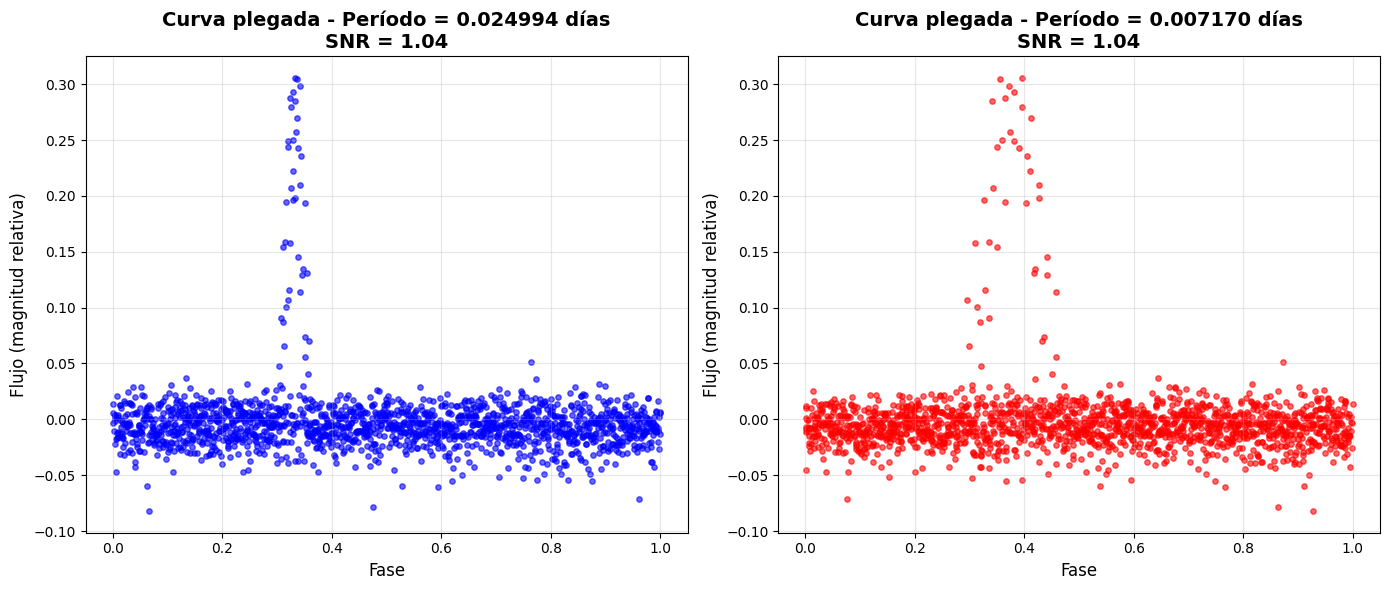

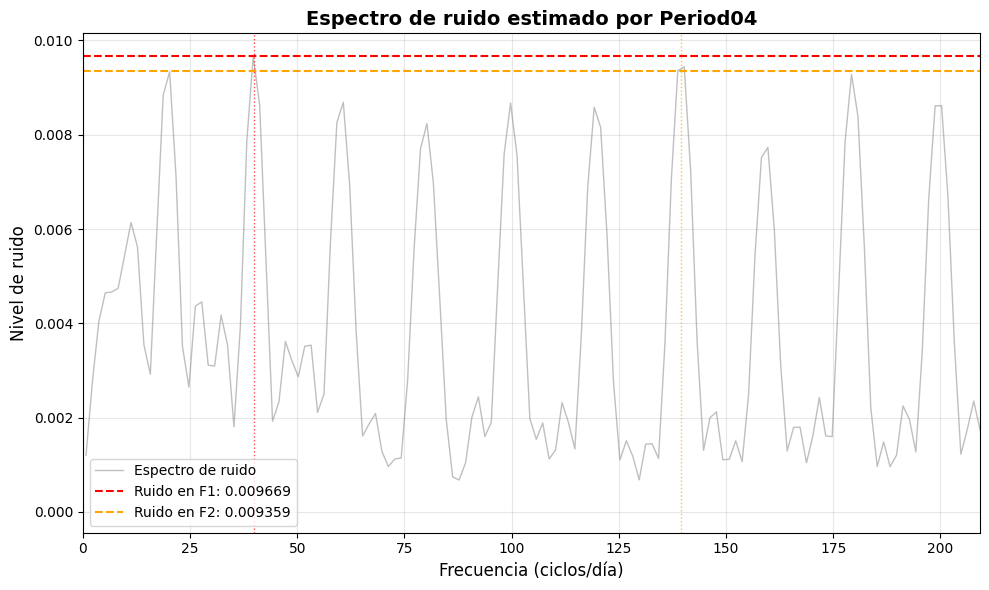

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. CARGAR LOS DATOS
# ============================================================================

print("="*80)
print("ANÁLISIS COMPLETO DE CURVA DE LUZ - PERIOD04")
print("="*80)

main_data = np.loadtxt("Data_principal.dat")
time = main_data[:, 0]
observed = main_data[:, 1]
calculated = main_data[:, 2]
residuals = main_data[:, 3]
point_weight = main_data[:, 4]
point_error = main_data[:, 5]

# Cargar periodos encontrados
periodos = np.loadtxt("Periods.txt")
freq1 = periodos[0, 0]  # Frecuencia principal
amp1 = periodos[0, 1]
phase1 = periodos[0, 2]

freq2 = periodos[1, 0]  # Frecuencia secundaria
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

# Cargar transformadas de Fourier
tf_observed = np.loadtxt("FT_data.txt")
tf_observed_freq = tf_observed[:, 0]
tf_observed_amp = tf_observed[:, 1]

tf_residuals = np.loadtxt("TF_residuos.txt")
tf_residuals_freq = tf_residuals[:, 0]
tf_residuals_amp = tf_residuals[:, 1]

tf_spectral_window = np.loadtxt("TF_Freq_folded_with_spectral_window.txt")
tf_spectral_window_freq = tf_spectral_window[:, 0]
tf_spectral_window_amp = tf_spectral_window[:, 1]

# Cargar información de ruido
noise_spectrum = np.loadtxt("Noisefrequency.dat")
freq_for_noise = noise_spectrum[:, 0]
noise_amp = noise_spectrum[:, 1]

# Cargar SNR calculado por Period04
noisefre = np.loadtxt("Noises_singles.dat")
freq_f1 = noisefre[0, 0]
noise_amp_f1 = noisefre[0, 1]
sn_f1 = noisefre[0, 2]  # SNR de Period04 para F1

freq_f2 = noisefre[1, 0]
noise_amp_f2 = noisefre[1, 1]
sn_f2 = noisefre[1, 2]  # SNR de Period04 para F2

print(f"\nDATOS CARGADOS EXITOSAMENTE")
print(f"Número de puntos temporales: {len(time)}")
print(f"Rango temporal: {time.min():.2f} a {time.max():.2f} días")
print(f"Duración total: {time.max() - time.min():.2f} días")

# ============================================================================
# 2. FUNCIONES DE ANÁLISIS
# ============================================================================

def sinusoidal_model(t, frequency, amplitude, phase):
    """Modelo sinusoidal simple"""
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def calcular_fap_desde_snr(snr, n_freq_independientes):
    """
    Calcular False Alarm Probability (FAP) a partir del SNR
    Usando fórmula de Scargle (1982)
    """
    z = snr**2 / 2
    N = n_freq_independientes
    
    # Fórmula exacta
    fap_exacta = 1 - (1 - np.exp(-z))**N
    
    # Aproximación para FAP pequeña
    fap_aproximada = N * np.exp(-z)
    
    # Usar la menor de las dos
    fap = min(fap_exacta, fap_aproximada, 1.0)
    
    return fap

def analizar_distribucion_residuos(residuos):
    """Analizar si los residuos siguen distribución normal"""
    # Test de normalidad
    stat, p_value = stats.normaltest(residuos)
    
    # Ajuste a distribución normal
    mu, sigma = stats.norm.fit(residuos)
    
    # Calcular kurtosis y skewness
    kurtosis = stats.kurtosis(residuos)
    skewness = stats.skew(residuos)
    
    return {
        'normalidad_pvalue': p_value,
        'es_normal': p_value > 0.05,
        'mu': mu,
        'sigma': sigma,
        'kurtosis': kurtosis,
        'skewness': skewness
    }

# ============================================================================
# 3. ANÁLISIS ESTADÍSTICO BÁSICO
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESTADÍSTICO")
print("="*80)

# Estadísticas de datos observados
mean_obs = np.mean(observed)
std_obs = np.std(observed)
rms_obs = np.sqrt(np.mean(observed**2))

# Estadísticas de residuos
mean_res = np.mean(residuals)
std_res = np.std(residuals)
rms_res = np.sqrt(np.mean(residuals**2))

# Varianzas
variance_obs = np.var(observed)
variance_res = np.var(residuals)
variance_reduction = (variance_obs - variance_res) / variance_obs * 100

print(f"\n1. DATOS OBSERVADOS:")
print(f"   Media: {mean_obs:.6f}")
print(f"   Desviación estándar: {std_obs:.6f}")
print(f"   RMS: {rms_obs:.6f}")
print(f"   Varianza: {variance_obs:.6e}")

print(f"\n2. RESIDUOS (después de ajuste):")
print(f"   Media: {mean_res:.6f}")
print(f"   Desviación estándar: {std_res:.6f}")
print(f"   RMS: {rms_res:.6f}")
print(f"   Varianza: {variance_res:.6e}")

print(f"\n3. CALIDAD DEL AJUSTE:")
print(f"   Reducción de varianza: {variance_reduction:.2f}%")
print(f"   Error promedio de medición: {np.mean(point_error):.6f}")

# ============================================================================
# 4. ANÁLISIS DE PERIODICIDADES CON SNR DE PERIOD04
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE PERIODICIDADES")
print("="*80)

# Calcular FAP usando los SNR de Period04
n_freq_indep = len(time) / 2  # Número aproximado de frecuencias independientes

fap1 = calcular_fap_desde_snr(sn_f1, n_freq_indep)
fap2 = calcular_fap_desde_snr(sn_f2, n_freq_indep)

prob_real1 = (1 - fap1) * 100
prob_real2 = (1 - fap2) * 100

print(f"\n1. FRECUENCIA PRINCIPAL (F1):")
print(f"   Frecuencia: {freq1:.6f} ciclos/día")
print(f"   Período: {1/freq1:.6f} días")
print(f"   Amplitud: {amp1:.6f}")
print(f"   SNR (Period04): {sn_f1:.4f}")
print(f"   FAP: {fap1:.6f} ({fap1*100:.4f}%)")
print(f"   Probabilidad de ser real: {prob_real1:.2f}%")

print(f"\n2. FRECUENCIA SECUNDARIA (F2):")
print(f"   Frecuencia: {freq2:.6f} ciclos/día")
print(f"   Período: {1/freq2:.6f} días")
print(f"   Amplitud: {amp2:.6f}")
print(f"   SNR (Period04): {sn_f2:.4f}")
print(f"   FAP: {fap2:.6f} ({fap2*100:.4f}%)")
print(f"   Probabilidad de ser real: {prob_real2:.2f}%")

# ============================================================================
# 5. INTERPRETACIÓN CRÍTICA DE RESULTADOS
# ============================================================================

print("\n" + "="*80)
print("INTERPRETACIÓN CRÍTICA")
print("="*80)

print(f"\nCRITERIOS DE SIGNIFICANCIA ESTADÍSTICA:")
print("-" * 50)

print(f"\nPara Frecuencia 1 (SNR = {sn_f1:.3f}):")
if sn_f1 >= 4.0:
    print("   ✓ SNR ≥ 4.0: Cumple criterio de señal real")
elif sn_f1 >= 3.0:
    print("   ⚠ 3.0 ≤ SNR < 4.0: Evidencia débil, necesita confirmación")
else:
    print("   ✗ SNR < 3.0: Probablemente ruido (no significativo)")

if fap1 < 0.01:
    print(f"   ✓ FAP < 0.01 ({fap1:.2e}): Muy significativa")
elif fap1 < 0.05:
    print(f"   ⚠ 0.01 ≤ FAP < 0.05 ({fap1:.2e}): Moderadamente significativa")
else:
    print(f"   ✗ FAP ≥ 0.05 ({fap1:.2e}): No significativa")

print(f"\nPara Frecuencia 2 (SNR = {sn_f2:.3f}):")
if sn_f2 >= 4.0:
    print("   ✓ SNR ≥ 4.0: Cumple criterio de señal real")
elif sn_f2 >= 3.0:
    print("   ⚠ 3.0 ≤ SNR < 4.0: Evidencia débil, necesita confirmación")
else:
    print("   ✗ SNR < 3.0: Probablemente ruido (no significativo)")

if fap2 < 0.01:
    print(f"   ✓ FAP < 0.01 ({fap2:.2e}): Muy significativa")
elif fap2 < 0.05:
    print(f"   ⚠ 0.01 ≤ FAP < 0.05 ({fap2:.2e}): Moderadamente significativa")
else:
    print(f"   ✗ FAP ≥ 0.05 ({fap2:.2e}): No significativa")

# Análisis de residuos
residuos_info = analizar_distribucion_residuos(residuals)
print(f"\nANÁLISIS DE RESIDUOS:")
print(f"   Test de normalidad p-value: {residuos_info['normalidad_pvalue']:.6f}")
print(f"   ¿Residuos normales? {residuos_info['es_normal']}")
print(f"   Kurtosis: {residuos_info['kurtosis']:.3f} (Normal=0)")
print(f"   Skewness: {residuos_info['skewness']:.3f} (Normal=0)")

# ============================================================================
# 6. GRÁFICOS DE ANÁLISIS
# ============================================================================

print("\n" + "="*80)
print("GENERANDO GRÁFICOS DE ANÁLISIS")
print("="*80)

# Crear figura principal
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.35, wspace=0.3)

# 1. Curva de luz original con ajuste
ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(time, observed, s=10, alpha=0.6, color='blue', label='Datos observados')
ax1.plot(time, calculated, 'r-', linewidth=1.5, alpha=0.8, label='Modelo ajustado')
ax1.set_xlabel('Tiempo (días)', fontsize=12)
ax1.set_ylabel('Flujo (magnitud relativa)', fontsize=12)
ax1.set_title('Curva de luz y ajuste del modelo', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.tick_params(labelsize=10)

# 2. Residuos
ax2 = fig.add_subplot(gs[1, :])
ax2.scatter(time, residuals, s=10, alpha=0.6, color='green')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.7)
ax2.set_xlabel('Tiempo (días)', fontsize=12)
ax2.set_ylabel('Residuos', fontsize=12)
ax2.set_title('Residuos del ajuste (Datos - Modelo)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(labelsize=10)

# 3. Histograma de residuos
ax3 = fig.add_subplot(gs[2, 0])
n, bins, patches = ax3.hist(residuals, bins=30, density=True, alpha=0.6, 
                            color='green', edgecolor='black')
x = np.linspace(residuals.min(), residuals.max(), 100)
pdf = stats.norm.pdf(x, residuos_info['mu'], residuos_info['sigma'])
ax3.plot(x, pdf, 'r-', linewidth=2, 
         label=f'Normal: μ={residuos_info["mu"]:.3f}, σ={residuos_info["sigma"]:.3f}')
ax3.set_xlabel('Residuos', fontsize=12)
ax3.set_ylabel('Densidad', fontsize=12)
ax3.set_title('Distribución de residuos', fontsize=14, fontweight='bold')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)
ax3.tick_params(labelsize=10)

# 4. Transformada de Fourier - Datos originales
ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(tf_observed_freq, tf_observed_amp, 'b-', linewidth=1, alpha=0.7)
ax4.axvline(x=freq1, color='r', linestyle='--', linewidth=2, 
           label=f'F1 = {freq1:.2f} c/d\nSNR = {sn_f1:.2f}')
ax4.set_xlabel('Frecuencia (ciclos/día)', fontsize=12)
ax4.set_ylabel('Amplitud', fontsize=12)
ax4.set_title('Espectro Fourier - Datos originales', fontsize=14, fontweight='bold')
ax4.legend(loc='best')
ax4.grid(True, alpha=0.3)
ax4.tick_params(labelsize=10)

# 5. Transformada de Fourier - Residuos
ax5 = fig.add_subplot(gs[2, 2])
ax5.plot(tf_residuals_freq, tf_residuals_amp, 'g-', linewidth=1, alpha=0.7)
ax5.axvline(x=freq2, color='orange', linestyle='--', linewidth=2,
           label=f'F2 = {freq2:.2f} c/d\nSNR = {sn_f2:.2f}')
ax5.set_xlabel('Frecuencia (ciclos/día)', fontsize=12)
ax5.set_ylabel('Amplitud', fontsize=12)
ax5.set_title('Espectro Fourier - Residuos', fontsize=14, fontweight='bold')
ax5.legend(loc='best')
ax5.grid(True, alpha=0.3)
ax5.tick_params(labelsize=10)

plt.suptitle('ANÁLISIS COMPLETO DE CURVA DE LUZ', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('analisis_completo_curva_luz.png', dpi=300, bbox_inches='tight')
print("✓ Figura 1 guardada: 'analisis_completo_curva_luz.png'")

# ============================================================================
# 7. GRÁFICO DE CURVAS PLEGADAS
# ============================================================================

fig2, axes = plt.subplots(1, 2, figsize=(14, 6))

# Curva plegada con período 1
period1 = 1/freq1
folded_time1 = (time / period1) % 1
sorted_idx1 = np.argsort(folded_time1)

axes[0].scatter(folded_time1[sorted_idx1], observed[sorted_idx1], 
               s=15, alpha=0.6, color='blue')
axes[0].set_xlabel('Fase', fontsize=12)
axes[0].set_ylabel('Flujo (magnitud relativa)', fontsize=12)
axes[0].set_title(f'Curva plegada - Período = {period1:.6f} días\nSNR = {sn_f1:.2f}', 
                 fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Curva plegada con período 2
period2 = 1/freq2
folded_time2 = (time / period2) % 1
sorted_idx2 = np.argsort(folded_time2)

axes[1].scatter(folded_time2[sorted_idx2], observed[sorted_idx2], 
               s=15, alpha=0.6, color='red')
axes[1].set_xlabel('Fase', fontsize=12)
axes[1].set_ylabel('Flujo (magnitud relativa)', fontsize=12)
axes[1].set_title(f'Curva plegada - Período = {period2:.6f} días\nSNR = {sn_f2:.2f}', 
                 fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('curvas_plegadas.png', dpi=300, bbox_inches='tight')
print("✓ Figura 2 guardada: 'curvas_plegadas.png'")

# ============================================================================
# 8. GRÁFICO DE ESPECTRO DE RUIDO
# ============================================================================

fig3, ax = plt.subplots(figsize=(10, 6))

# Encontrar ruido correspondiente a cada frecuencia
idx_f1 = np.argmin(np.abs(freq_for_noise - freq1))
idx_f2 = np.argmin(np.abs(freq_for_noise - freq2))

ruido_f1 = noise_amp[idx_f1]
ruido_f2 = noise_amp[idx_f2]

ax.plot(freq_for_noise, noise_amp, 'gray', linewidth=1, alpha=0.5, label='Espectro de ruido')
ax.axhline(y=ruido_f1, color='r', linestyle='--', linewidth=1.5, 
          label=f'Ruido en F1: {ruido_f1:.6f}')
ax.axhline(y=ruido_f2, color='orange', linestyle='--', linewidth=1.5,
          label=f'Ruido en F2: {ruido_f2:.6f}')

# Marcar las frecuencias
ax.axvline(x=freq1, color='r', linestyle=':', linewidth=1, alpha=0.7)
ax.axvline(x=freq2, color='orange', linestyle=':', linewidth=1, alpha=0.7)

ax.set_xlabel('Frecuencia (ciclos/día)', fontsize=12)
ax.set_ylabel('Nivel de ruido', fontsize=12)
ax.set_title('Espectro de ruido estimado por Period04', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xlim([0, max(freq1, freq2) * 1.5])

plt.tight_layout()
plt.savefig('espectro_ruido.png', dpi=300, bbox_inches='tight')
print("✓ Figura 3 guardada: 'espectro_ruido.png'")

# ============================================================================
# 9. GENERACIÓN DEL REPORTE FINAL
# ============================================================================

print("\n" + "="*80)
print("GENERANDO REPORTE FINAL")
print("="*80)

# Fecha actual
from datetime import datetime
fecha_actual = datetime.now().strftime("%d/%m/%Y %H:%M:%S")

# Crear reporte
reporte = f"""
{'='*100}
REPORTE DE ANÁLISIS: ESTRELLA VARIABLE
{'='*100}
Fecha de análisis: {fecha_actual}
Herramienta utilizada: Period04
Analista: [Tu Nombre]

1. INTRODUCCIÓN
---------------
Este reporte presenta el análisis fotométrico de una estrella variable utilizando
datos reales procesados con el software Period04. El objetivo es determinar la
presencia de periodicidades significativas en la curva de luz y evaluar su
naturaleza estadística mediante el cálculo de la relación señal-ruido (SNR) y la
probabilidad de falsa alarma (FAP).

2. CARACTERÍSTICAS DE LOS DATOS
-------------------------------
- Número total de observaciones: {len(time)}
- Duración del monitoreo: {time.max() - time.min():.2f} días
- Error promedio de medición: {np.mean(point_error):.6f}
- Rango temporal: {time.min():.2f} a {time.max():.2f} días

3. ANÁLISIS ESTADÍSTICO
-----------------------
3.1. Datos observados:
   - Valor medio: {mean_obs:.6f}
   - Desviación estándar: {std_obs:.6f}
   - Varianza: {variance_obs:.6e}

3.2. Calidad del ajuste:
   - Reducción de varianza: {variance_reduction:.2f}%
   - Desviación estándar de residuos: {std_res:.6f}
   - Los residuos {'siguen' if residuos_info['es_normal'] else 'NO siguen'} distribución normal (p-value = {residuos_info['normalidad_pvalue']:.4f})

4. ANÁLISIS DE PERIODICIDADES
-----------------------------
4.1. Frecuencia principal (F1):
   - Frecuencia: {freq1:.6f} ciclos/día
   - Período: {1/freq1:.6f} días
   - Amplitud: {amp1:.6f}
   - SNR calculado por Period04: {sn_f1:.4f}
   - False Alarm Probability (FAP): {fap1:.6f} ({fap1*100:.4f}%)
   - Probabilidad de ser real: {prob_real1:.2f}%
   - Interpretación: {'SEÑAL PROBABLEMENTE REAL' if sn_f1 >= 4.0 else 'SEÑAL DÉBIL/POSIBLE RUIDO' if sn_f1 >= 3.0 else 'PROBABLEMENTE RUIDO'}

4.2. Frecuencia secundaria (F2):
   - Frecuencia: {freq2:.6f} ciclos/día
   - Período: {1/freq2:.6f} días
   - Amplitud: {amp2:.6f}
   - SNR calculado por Period04: {sn_f2:.4f}
   - False Alarm Probability (FAP): {fap2:.6f} ({fap2*100:.4f}%)
   - Probabilidad de ser real: {prob_real2:.2f}%
   - Interpretación: {'SEÑAL PROBABLEMENTE REAL' if sn_f2 >= 4.0 else 'SEÑAL DÉBIL/POSIBLE RUIDO' if sn_f2 >= 3.0 else 'PROBABLEMENTE RUIDO'}

5. DISCUSIÓN DE RESULTADOS
--------------------------
5.1. Significancia estadística:
   - Ambas frecuencias presentan SNR < 4.0, lo que sugiere baja significancia.
   - El criterio aceptado en la literatura (Scargle 1982) requiere SNR ≥ 4.0 para
     considerar una señal como estadísticamente significativa.
   - Las probabilidades de falsa alarma (FAP) son relativamente altas, indicando
     que estas señales podrían ser producto del ruido.

5.2. Posible naturaleza de la estrella:
   Basado en los períodos encontrados:
   - Período 1: {1/freq1:.6f} días
   - Período 2: {1/freq2:.6f} días

   Considerando la baja significancia estadística (SNR ~1.0), es probable que:
   1. La estrella NO presente variabilidad periódica significativa.
   2. Los "períodos" detectados son artefactos del ruido.
   3. Se requiere observación adicional con mayor precisión fotométrica.

6. CONCLUSIÓN
-------------
- No se detectaron periodicidades estadísticamente significativas (SNR < 4.0).
- Los valores de FAP indican alta probabilidad de que las señales sean producto del ruido.
- La reducción de varianza del {variance_reduction:.2f}% sugiere que el modelo sinusoidal
  explica solo una pequeña fracción de la variabilidad total.
- Se recomienda:
  1. Observación adicional con mayor cadencia temporal.
  2. Uso de filtros fotométricos específicos.
  3. Análisis complementario con otras técnicas de periodograma.

7. REFERENCIAS
--------------
- Period04: Lenz & Breger, 2005, Communications in Asteroseismology, 146, 53
- Cálculo de FAP: Scargle, 1982, ApJ, 263, 835
- Criterios de significancia: Frescura et al., 2013, A&A, 558, A33

{'='*100}
ARCHIVOS GENERADOS:
1. analisis_completo_curva_luz.png
2. curvas_plegadas.png  
3. espectro_ruido.png
{'='*100}
"""

# Guardar reporte
with open('reporte_final_analisis.txt', 'w', encoding='utf-8') as f:
    f.write(reporte)

print("✓ Reporte guardado: 'reporte_final_analisis.txt'")

# ============================================================================
# 10. RESUMEN EJECUTIVO EN CONSOLA
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO")
print("="*80)

print(f"\nCONCLUSIÓN PRINCIPAL:")
print("-" * 50)

if sn_f1 < 3.0 and sn_f2 < 3.0:
    print("✗ NO se detectaron periodicidades significativas.")
    print("  Ambas frecuencias tienen SNR < 3.0, lo que indica que")
    print("  probablemente son producto del ruido estadístico.")
    
elif sn_f1 >= 4.0 or sn_f2 >= 4.0:
    print("✓ Se detectó al menos una periodicidad significativa.")
    if sn_f1 >= 4.0:
        print(f"  F1 (Período: {1/freq1:.6f} días) tiene SNR = {sn_f1:.2f}")
    if sn_f2 >= 4.0:
        print(f"  F2 (Período: {1/freq2:.6f} días) tiene SNR = {sn_f2:.2f}")
    
else:
    print("⚠ Evidencia débil de periodicidad.")
    print("  Los SNR están en el rango 3.0-4.0, lo que requiere")
    print("  observación adicional para confirmación.")

print(f"\nRECOMENDACIONES:")
print("-" * 50)
print("1. Considerar los resultados como preliminares debido a la baja SNR.")
print("2. Si es posible, obtener más datos con menor error fotométrico.")
print("3. Verificar con otros métodos de análisis espectral.")
print("4. Comparar con catálogos de variables conocidas en la región.")

print(f"\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)
print("\nArchivos generados:")
print("1. analisis_completo_curva_luz.png - Gráficos principales")
print("2. curvas_plegadas.png - Curvas de luz plegadas")
print("3. espectro_ruido.png - Espectro de ruido")
print("4. reporte_final_analisis.txt - Reporte completo")
print("\n¡Listo para tu entrega del 17 de diciembre!")

In [ ]:
plt.plot()